# Telecom Churn Prediction

Author: William Lannin

Date: 3rd May 2024

In [29]:
import pandas as pd
import numpy as np
import os as os
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


# 0 View Initial Dataset

In [4]:
# load dataset
base_df = pd.read_csv(r"C:\Users\William.Lannin\github_repos\will-lannin-projects\1 - Telecom Churn Prediction\Input\dataset_from_kaggle_telecom.csv")
base_df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# describe the data
base_df.describe()

# can already see most of the columns must be categorical else they'd appear here


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# info on the data
base_df.info()

# no nulls, should check object columns for any values that represent null data though


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# I noticed total charges column should be a number, investigate this
base_df['TotalCharges'].astype(float)

# clearly there are some empty values stopping it from being viewed as a number
# we should fill any blank strings with the number 0 for that column.  
# UPON REFLECTION, LETS REMOVE THOSE ROWS IN THE NEXT SECTION, SINCE WE HAVE INCOMPLETE DATA


ValueError: could not convert string to float: ''

In [10]:
# how many yes vs no do we have in the target
base_df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 1 Data Cleaning

In [176]:
# create a new dataframe called clean_df where we will ensure all teh data within it is ready to be used for our modelling
clean_df = base_df.copy()


In [177]:
# # fill those blank strings in total charges column and convert it to float
# clean_df['TotalCharges'] = clean_df['TotalCharges'].apply(lambda x: 0 if x == ' ' else x).astype(float)
# clean_df['TotalCharges']

# drop the rows where TotalCharges is a whitespace
clean_df = clean_df.loc[clean_df['TotalCharges'] != ' ']


In [178]:
# now convert total charges to float
clean_df['TotalCharges'] = clean_df['TotalCharges'].astype(float)


In [27]:
# check for values representing nulls in any of the other columns
for col in clean_df.columns:
    if '' in clean_df[col]:
        print('col has blank')
    if ' ' in clean_df[col]:
        print('col has whitespace')

# okay we will see any rogue values appear when we visualise the data, but for now we are happy


In [28]:
clean_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# 2 Visualise Data

## 2.1 Categorical Features

[Text(0.5, 1.0, 'gender')]

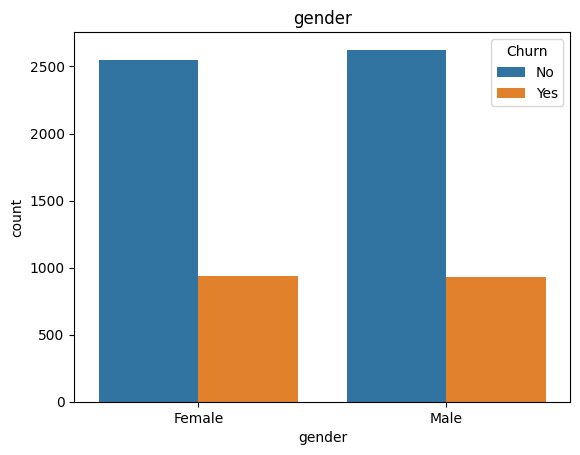

In [57]:
column_name = 'gender'

# raw counts
# sns.countplot(data=clean_df,x=column_name)

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'SeniorCitizen')]

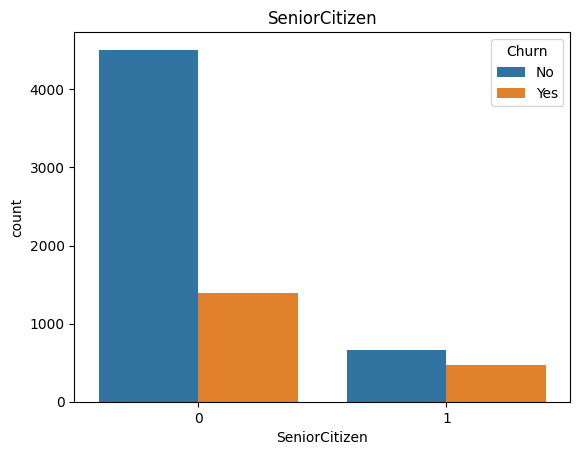

In [56]:
column_name = 'SeniorCitizen'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'Partner')]

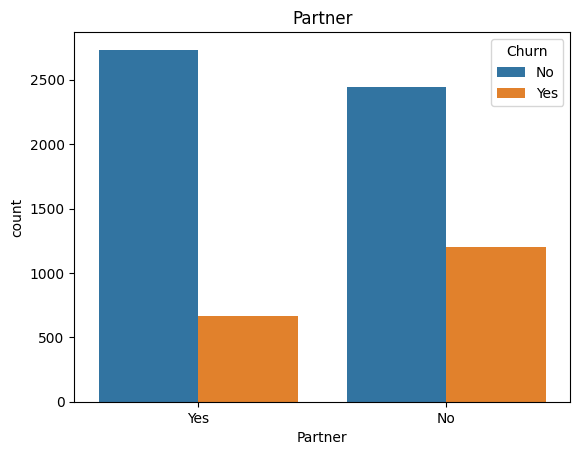

In [55]:
column_name = 'Partner'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'Dependents')]

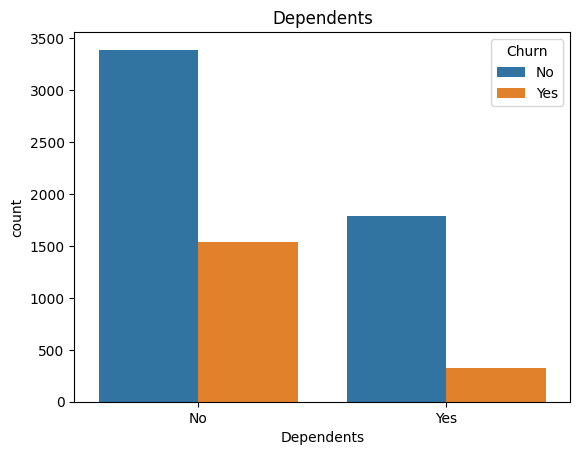

In [54]:
column_name = 'Dependents'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'PhoneService')]

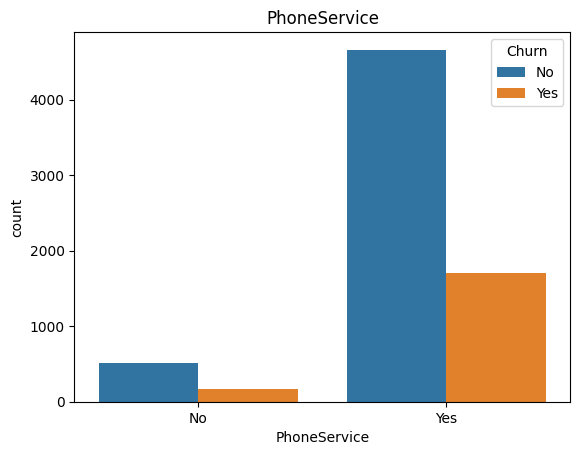

In [53]:
column_name = 'PhoneService'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')

# very few have no phone service


[Text(0.5, 1.0, 'MultipleLines')]

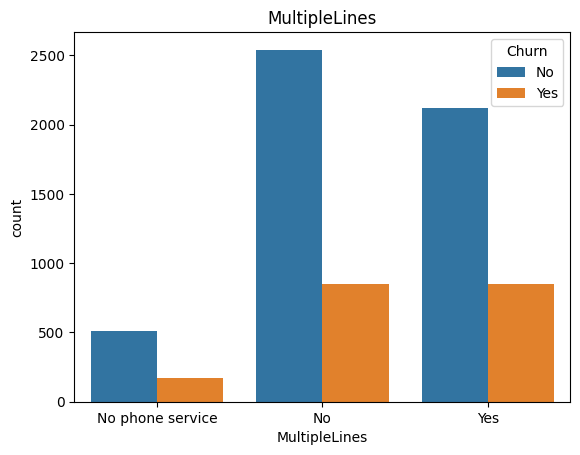

In [58]:
column_name = 'MultipleLines'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'InternetService')]

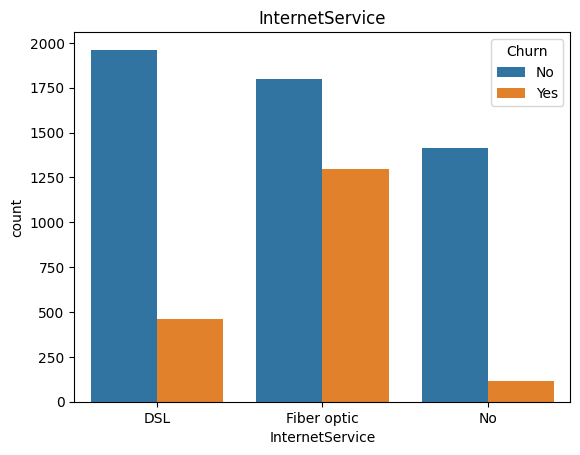

In [59]:
column_name = 'InternetService'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')

# most people with no internet service clearly do not churn!


[Text(0.5, 1.0, 'OnlineSecurity')]

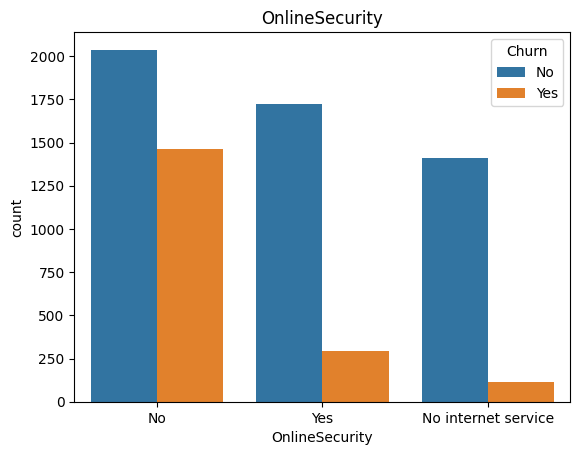

In [60]:
column_name = 'OnlineSecurity'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')

# people with online security more likely to churn (still less than 50% though)


[Text(0.5, 1.0, 'OnlineBackup')]

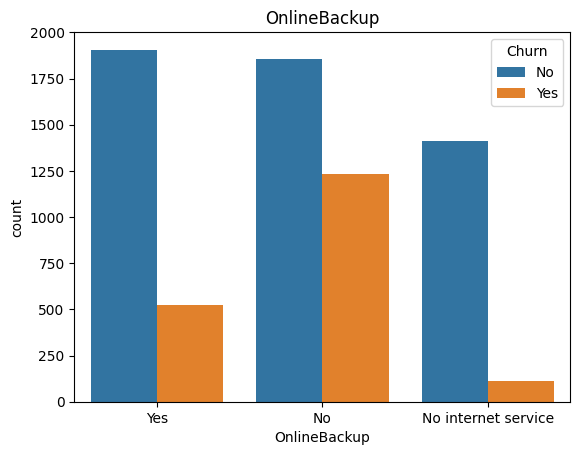

In [61]:
column_name = 'OnlineBackup'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'DeviceProtection')]

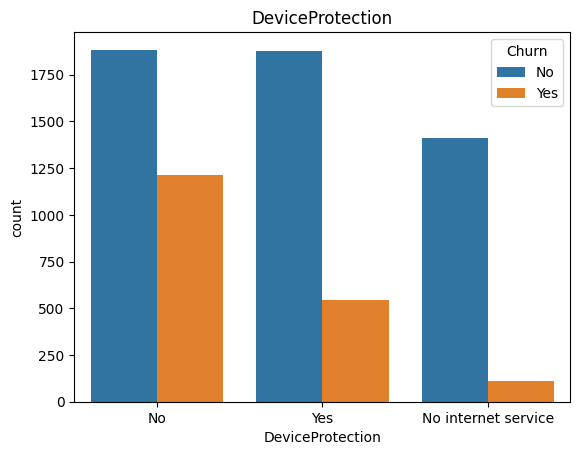

In [64]:
column_name = 'DeviceProtection'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'TechSupport')]

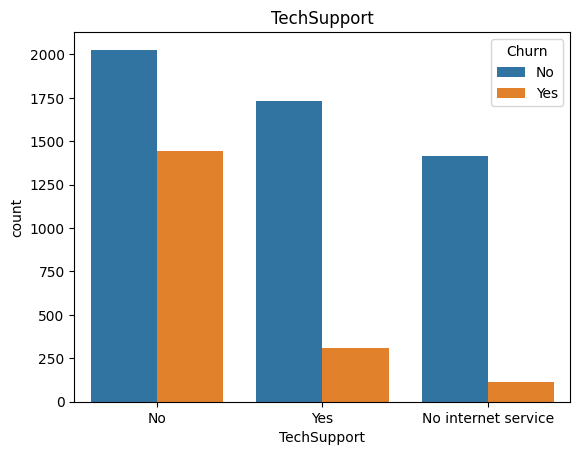

In [65]:
column_name = 'TechSupport'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'StreamingTV')]

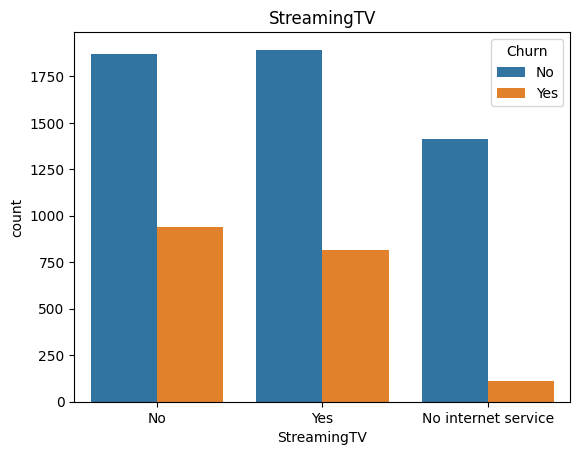

In [66]:
column_name = 'StreamingTV'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')

# not much in it between whether they do stream tv or do not


[Text(0.5, 1.0, 'StreamingMovies')]

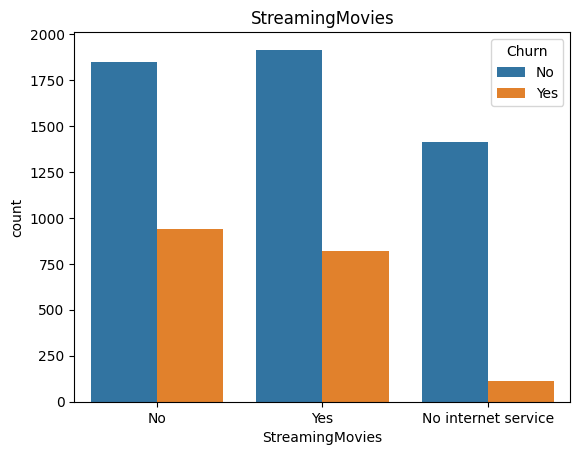

In [67]:
column_name = 'StreamingMovies'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'Contract')]

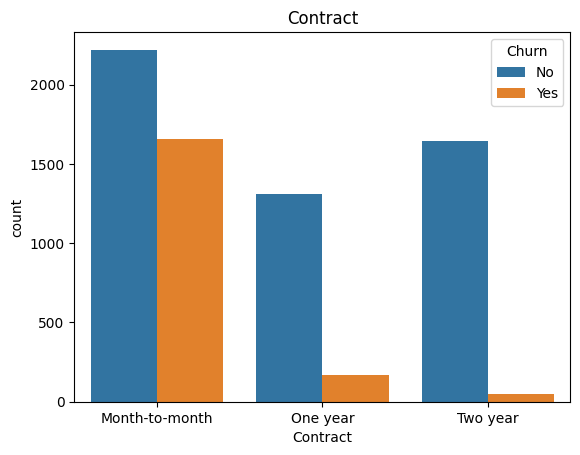

In [68]:
column_name = 'Contract'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')

# clearly people with longer contracts are much less likely to churn which makes sense


[Text(0.5, 1.0, 'PaperlessBilling')]

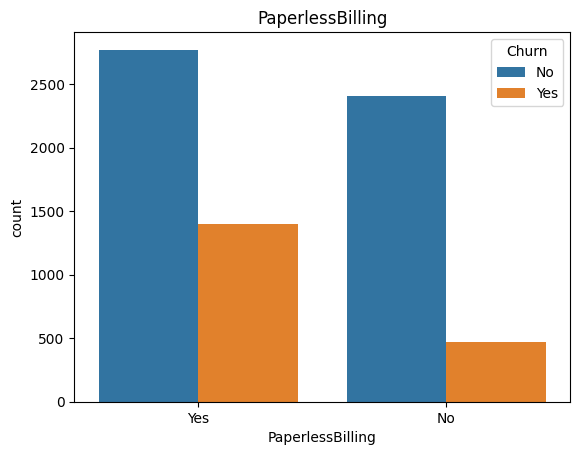

In [69]:
column_name = 'PaperlessBilling'

# how many churn in each
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


[Text(0.5, 1.0, 'PaymentMethod')]

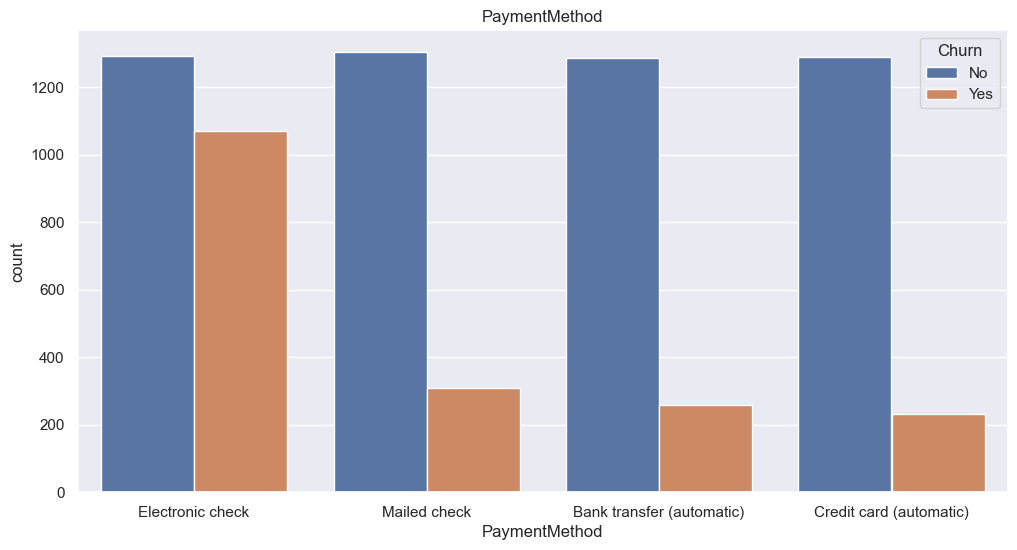

In [89]:
column_name = 'PaymentMethod'

# how many churn in each
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(data=clean_df,x=column_name,hue='Churn',dodge=True).set(title=f'{column_name}')


# electronic check stands out here


## 2.2 Numeric Features

### tenure

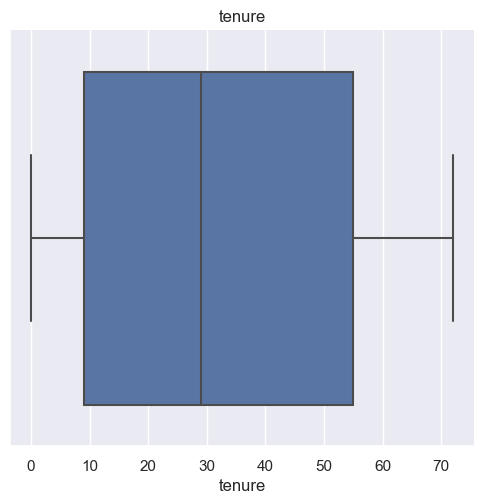

In [98]:
column_name = 'tenure'

sns.catplot(data=clean_df, kind='box', x=column_name).set(title=column_name)

# No outliers at overall level


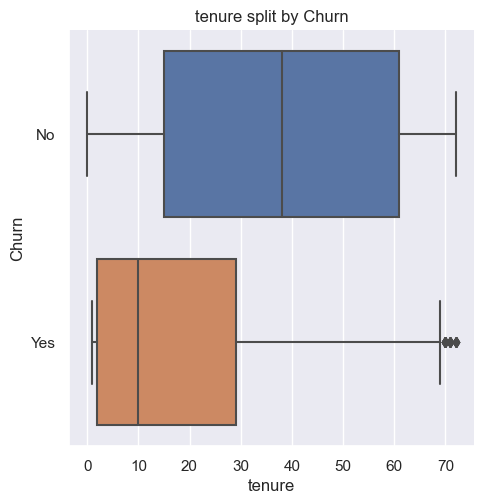

In [97]:
# plot their relationship with churn

column_name = 'tenure'

sns.set(rc={"figure.figsize":(24,6)})
sns.catplot(data=clean_df, kind='box', x=column_name, y='Churn').set(title=f"{column_name} split by Churn")

# Notes:
# few outliers in the tenure for Churn = 'Yes'


### monthly charges

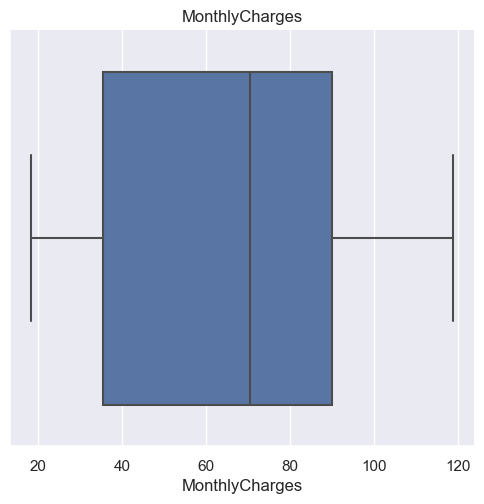

In [99]:
column_name = 'MonthlyCharges'

sns.catplot(data=clean_df, kind='box', x=column_name).set(title=column_name)

# No outliers at overall level


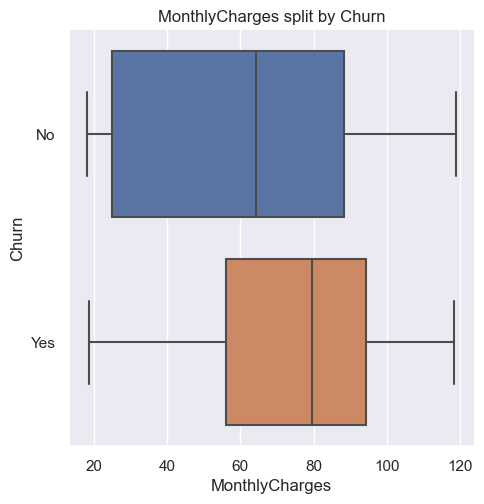

In [101]:
# plot their relationship with churn

column_name = 'MonthlyCharges'

sns.set(rc={"figure.figsize":(24,6)})
sns.catplot(data=clean_df, kind='box', x=column_name, y='Churn').set(title=f"{column_name} split by Churn")

# Notes:
# No outliers
# customers who churn have higher monthly charges on average (may be linked to month-to-month payments)


### TotalCharges

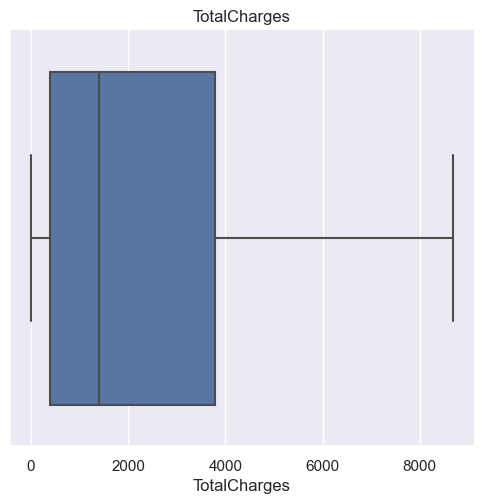

In [103]:
column_name = 'TotalCharges'

sns.catplot(data=clean_df, kind='box', x=column_name).set(title=column_name)

# No outliers at overall level


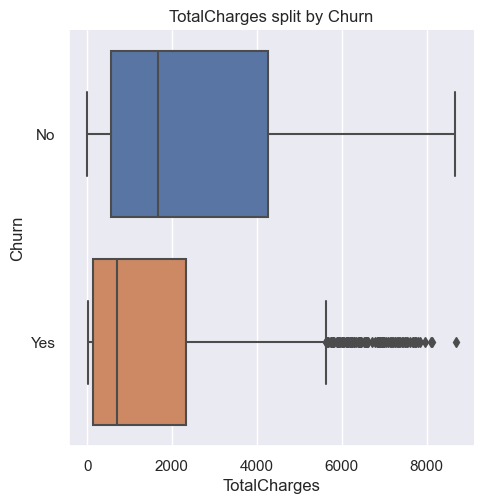

In [104]:
# plot their relationship with churn

column_name = 'TotalCharges'

sns.set(rc={"figure.figsize":(24,6)})
sns.catplot(data=clean_df, kind='box', x=column_name, y='Churn').set(title=f"{column_name} split by Churn")

# Notes:
# several upper outliers in the 'Yes' churn part of the chart 


### additional

[Text(0.5, 1.0, 'Monthly vs Total Charges, coloured by Churn')]

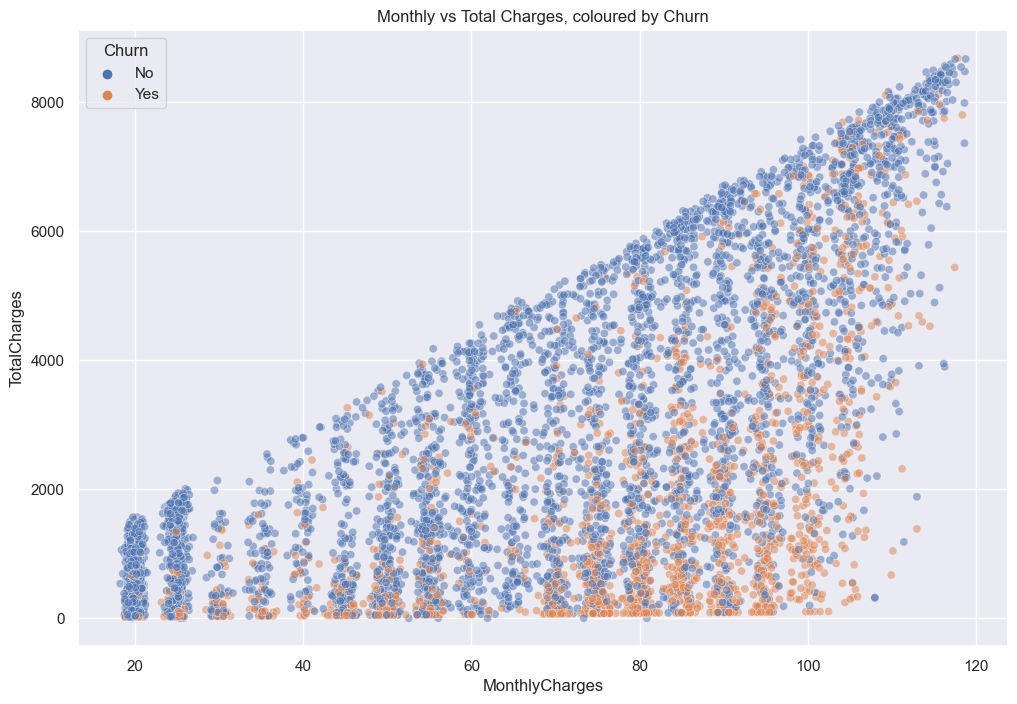

In [111]:
# scatter chart

sns.set(rc={"figure.figsize":(12,8)})
sns.scatterplot(data=clean_df, x='MonthlyCharges', y='TotalCharges', hue='Churn',alpha=0.5).set(title=f"Monthly vs Total Charges, coloured by Churn")


[Text(0.5, 1.0, 'are monthly charges higher for month to month vs other contracts?')]

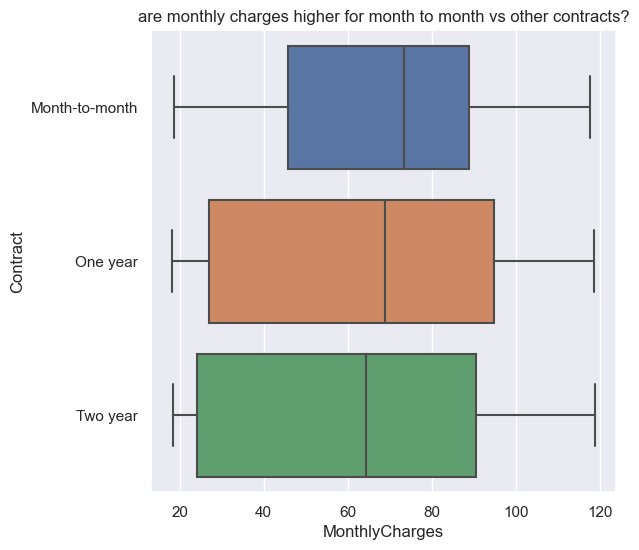

In [113]:
# are monthly charges higher for month to month vs other contracts?

sns.set(rc={"figure.figsize":(6,6)})
sns.boxplot(data=clean_df, x='MonthlyCharges', y='Contract').set(title=f"are monthly charges higher for month to month vs other contracts?")


# 3 Feature Engineering

In [ ]:
# steps we need to take to prep the data for machine learning:
# 1) convert binary categorical vars to be numerical features
# 2) one-hot encode categorical variables


In [153]:
eng_df = clean_df.copy()  #make a copy of our clean dataframe

## 3.1 non-binary cols

In [154]:
# list the categorical columns that can't be viewed directly as a binary column
nonbinary_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']



In [155]:
# I noticed some values can probably be derrived from each other, but we need to check this
# in our final model we could include these as interactions!

# MultipleLines has a 'No phone service' value - can be inferred from PhoneService?

# OnlineSecurity & OnlineBackup & DeviceProtection & TechSupport & StreamingTV & StreamingMovies all have "No internet service" value - can be derrived from InternetService?




In [156]:
# check the 'No phone service' value in 'MultipleLines'

# we're looking for rows where MultipleLines and PhoneService do not match up
eng_df[['MultipleLines','PhoneService']].value_counts()

# we see they match up exactly so we will bear this in mind


MultipleLines     PhoneService
No                Yes             3390
Yes               Yes             2971
No phone service  No               682
Name: count, dtype: int64

In [157]:
# OnlineSecurity &  InternetService

eng_df[['OnlineSecurity','InternetService']].value_counts()

# we see No internet service lines up perfectly


OnlineSecurity       InternetService
No                   Fiber optic        2257
No internet service  No                 1526
No                   DSL                1241
Yes                  DSL                1180
                     Fiber optic         839
Name: count, dtype: int64

In [158]:
# OnlineBackup &  InternetService
test_col = 'OnlineBackup'

eng_df[[test_col,'InternetService']].value_counts()

# we see No internet service lines up perfectly


OnlineBackup         InternetService
No                   Fiber optic        1753
No internet service  No                 1526
Yes                  Fiber optic        1343
No                   DSL                1335
Yes                  DSL                1086
Name: count, dtype: int64

In [159]:
# DeviceProtection &  InternetService
test_col = 'DeviceProtection'

eng_df[[test_col,'InternetService']].value_counts()

# we see No internet service lines up perfectly


DeviceProtection     InternetService
No                   Fiber optic        1739
No internet service  No                 1526
Yes                  Fiber optic        1357
No                   DSL                1356
Yes                  DSL                1065
Name: count, dtype: int64

In [160]:
# TechSupport &  InternetService
test_col = 'TechSupport'

eng_df[[test_col,'InternetService']].value_counts()

# we see No internet service lines up perfectly


TechSupport          InternetService
No                   Fiber optic        2230
No internet service  No                 1526
No                   DSL                1243
Yes                  DSL                1178
                     Fiber optic         866
Name: count, dtype: int64

In [161]:
# StreamingTV &  InternetService
test_col = 'StreamingTV'

eng_df[[test_col,'InternetService']].value_counts()

# we see No internet service lines up perfectly


StreamingTV          InternetService
Yes                  Fiber optic        1750
No internet service  No                 1526
No                   DSL                1464
                     Fiber optic        1346
Yes                  DSL                 957
Name: count, dtype: int64

In [162]:
# StreamingMovies &  InternetService
test_col = 'StreamingMovies'

eng_df[[test_col,'InternetService']].value_counts()

# we see No internet service lines up perfectly


StreamingMovies      InternetService
Yes                  Fiber optic        1751
No internet service  No                 1526
No                   DSL                1440
                     Fiber optic        1345
Yes                  DSL                 981
Name: count, dtype: int64

In [163]:
# so, especially when using these features with "No internet service" as an option, we can simply code them as binary variables, and then code "No internet service" as another binary variable
# then we must choose between including fiber optic or DSL as the other internet service binary variable, but we'll kick that can down the road for now

In [171]:
# one hot encoding these columns, and joining resulting encoded columns to eng_df

eng1_df = clean_df.copy()  #make a copy of our clean dataframe

for old_col in nonbinary_cols:
    encoded = pd.get_dummies(eng1_df[old_col]).astype("int")
    # add column name to the start of each encoded column, and replace whitespace with underscore, and lower case all
    # also just added code to remove (automatic) from column names since it is useless to us
    encoded.columns = [str.lower(old_col+"_"+new_col.replace(" ","_").replace("_(automatic)","")) for new_col in encoded.columns]
    eng1_df = eng1_df.join(encoded)


In [172]:
eng1_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'multiplelines_no', 'multiplelines_no_phone_service',
       'multiplelines_yes', 'internetservice_dsl',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no', 'onlinesecurity_no_internet_service',
       'onlinesecurity_yes', 'onlinebackup_no',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no', 'deviceprotection_no_internet_service',
       'deviceprotection_yes', 'techsupport_no',
       'techsupport_no_internet_service', 'techsupport_yes', 'streamingtv_no',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no', 'stre

## 3.2 binary cols

In [174]:
# the remaining cateogrical vars are the ones we already have in a form that can be converted to binary, so grab them
binary_cols = [col for col in clean_df.select_dtypes('object').columns if col not in nonbinary_cols + ['customerID']]
binary_cols
# notice senior citizen is not here since it is already a binary integer type column


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [175]:
# copy new eng dataframe
eng2_df = eng1_df.copy()

# for each binary column, create a new column filled with 0. Then, set the column to have value 1 for any cells where the corresponding original value was 'Yes'ArithmeticError
for col in binary_cols:
    # skip gender since it is different
    if col == 'gender':
        continue
    # new column initialised
    newcolname = str.lower(col+'_binary')
    eng2_df[newcolname] = 0
    # flag as 1 when corresponding column has 'Yes' in
    eng2_df.loc[eng2_df[col] == 'Yes',newcolname] = 1

# now the only one we have missed is gender, so do this
eng2_df['female_binary'] = 0
eng2_df.loc[eng2_df[col] == 'Female','female_binary'] = 1

eng2_df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'multiplelines_no', 'multiplelines_no_phone_service',
       'multiplelines_yes', 'internetservice_dsl',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no', 'onlinesecurity_no_internet_service',
       'onlinesecurity_yes', 'onlinebackup_no',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no', 'deviceprotection_no_internet_service',
       'deviceprotection_yes', 'techsupport_no',
       'techsupport_no_internet_service', 'techsupport_yes', 'streamingtv_no',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no', 'stre

In [ ]:
# remember that when fititng models we can choose to just include the YES column for most of the variables
# this is true for multiplelines as long as we also include phoneservice_binary in the model
# this is true for all the columns that have _no_internet_service, as long as we include the feature internetservice_no

# 4 Outlier Checks

# 5 Correlation

# Model Fitting